In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns

In [2]:
# leemos el dataset limpio de partida, con las columas con las que vamos a trabajar

df_students_clean = pd.read_csv('C:\\Users\\saraf\\OneDrive\\Documentos\\Data Science and AI\\capstone project\\data\\df_students_clean.csv')

df_students_clean.head()

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,...,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,506.912,520.943,445.915,447.578,510.355,469.425,485.229,520.293,509.465,520.461
1,Agree,Disagree,NaN,NaN,Agree,Strongly agree,Agree,NaN,Some lessons,Some lessons,...,472.056,497.419,583.550,486.117,543.515,501.654,522.876,518.897,540.951,555.862
2,NaN,Agree,Agree,NaN,Agree,Agree,NaN,Disagree,Some lessons,Some lessons,...,336.125,383.288,390.317,360.386,389.356,424.082,377.563,422.321,363.447,431.934
3,Agree,Disagree,Agree,Strongly disagree,NaN,NaN,Agree,NaN,Every lesson,Every lesson,...,413.822,324.202,343.227,284.083,330.103,351.840,353.562,381.369,366.970,350.518
4,NaN,Strongly disagree,Strongly disagree,NaN,Strongly disagree,Strongly disagree,NaN,Agree,Most lessons,Most lessons,...,530.906,472.011,492.387,431.729,524.883,420.419,529.333,559.941,496.913,488.453


In [3]:
df_students_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30800 entries, 0 to 30799
Data columns (total 88 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ST267Q01JA  18516 non-null  object 
 1   ST267Q02JA  18403 non-null  object 
 2   ST267Q03JA  18464 non-null  object 
 3   ST267Q04JA  18378 non-null  object 
 4   ST267Q05JA  18545 non-null  object 
 5   ST267Q06JA  18283 non-null  object 
 6   ST267Q07JA  18381 non-null  object 
 7   ST267Q08JA  18550 non-null  object 
 8   ST270Q01JA  28806 non-null  object 
 9   ST270Q02JA  28746 non-null  object 
 10  ST270Q03JA  28756 non-null  object 
 11  ST270Q04JA  28769 non-null  object 
 12  ST297Q01JA  29406 non-null  object 
 13  ST300Q01JA  13422 non-null  object 
 14  ST300Q02JA  13490 non-null  object 
 15  ST300Q03JA  13511 non-null  object 
 16  ST300Q04JA  13298 non-null  object 
 17  ST300Q05JA  13332 non-null  object 
 18  ST300Q06JA  13293 non-null  object 
 19  ST300Q07JA  13398 non-nul

In [4]:
def obtener_significado(codigo, df_compendio):
    resultado = df_compendio.loc[df_compendio['Sigla'] == codigo, 'Explicacion']
    return resultado.iloc[0] if not resultado.empty else "Not found"

In [5]:
compendio = pd.read_excel('compendio_df_students.xlsx')

Imprimimos las columnas con las que estamos trabajando

In [6]:
for column in df_students_clean.columns:
    print(f"{column}: {obtener_significado(column, compendio)}")

ST267Q01JA: Agree/disagree: The teachers at my school are respectful towards me.
ST267Q02JA: Agree/disagree: If I walked into my classes upset, my teachers would be concerned about me.
ST267Q03JA: Agree/disagree: If I came back to visit my school 3 years from now, my teachers would be excited to see me.
ST267Q04JA: Agree/disagree: I feel intimidated by the teachers at my school.
ST267Q05JA: Agree/disagree: When my teachers ask how I am doing, they are really interested in my answer.
ST267Q06JA: Agree/disagree: The teachers at my school are friendly towards me.
ST267Q07JA: Agree/disagree: The teachers at my school are interested in students' well-being.
ST267Q08JA: Agree/disagree: The teachers at my school are mean towards me.
ST270Q01JA: How often: The teacher shows an interest in every student's learning.
ST270Q02JA: How often: The teacher gives extra help when students need it.
ST270Q03JA: How often: The teacher helps students with their learning.
ST270Q04JA: How often: The teacher c

In [7]:
df_students_clean.head()

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,...,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,506.912,520.943,445.915,447.578,510.355,469.425,485.229,520.293,509.465,520.461
1,Agree,Disagree,NaN,NaN,Agree,Strongly agree,Agree,NaN,Some lessons,Some lessons,...,472.056,497.419,583.550,486.117,543.515,501.654,522.876,518.897,540.951,555.862
2,NaN,Agree,Agree,NaN,Agree,Agree,NaN,Disagree,Some lessons,Some lessons,...,336.125,383.288,390.317,360.386,389.356,424.082,377.563,422.321,363.447,431.934
3,Agree,Disagree,Agree,Strongly disagree,NaN,NaN,Agree,NaN,Every lesson,Every lesson,...,413.822,324.202,343.227,284.083,330.103,351.840,353.562,381.369,366.970,350.518
4,NaN,Strongly disagree,Strongly disagree,NaN,Strongly disagree,Strongly disagree,NaN,Agree,Most lessons,Most lessons,...,530.906,472.011,492.387,431.729,524.883,420.419,529.333,559.941,496.913,488.453


## Preprocesado inicial

Descartamos columnas vacías

In [8]:
# descartar columnas que empiezan por PA

df_students_clean = df_students_clean.drop(df_students_clean.filter(regex='^PA').columns, axis=1)



In [9]:
df_students_clean.shape

(30800, 71)

In [10]:
df_students_clean.columns

Index(['ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA', 'ST267Q05JA',
       'ST267Q06JA', 'ST267Q07JA', 'ST267Q08JA', 'ST270Q01JA', 'ST270Q02JA',
       'ST270Q03JA', 'ST270Q04JA', 'ST297Q01JA', 'ST300Q01JA', 'ST300Q02JA',
       'ST300Q03JA', 'ST300Q04JA', 'ST300Q05JA', 'ST300Q06JA', 'ST300Q07JA',
       'ST300Q08JA', 'ST300Q09JA', 'ST300Q10JA', 'ST348Q04JA', 'ST348Q08JA',
       'ST353Q01JA', 'ST353Q02JA', 'ST353Q05JA', 'ST353Q06JA', 'ST353Q07JA',
       'ST353Q08JA', 'WB155Q08HA', 'WB155Q09HA', 'WB163Q01HA', 'WB163Q02HA',
       'WB163Q03HA', 'WB163Q04HA', 'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA',
       'WB163Q08HA', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH',
       'PV6MATH', 'PV7MATH', 'PV8MATH', 'PV9MATH', 'PV10MATH', 'PV1READ',
       'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 'PV6READ', 'PV7READ',
       'PV8READ', 'PV9READ', 'PV10READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE',
       'PV4SCIE', 'PV5SCIE', 'PV6SCIE', 'PV7SCIE', 'PV8SCIE', 'PV9SCIE',
       'PV10SC

Hacemos la media para cada uno de los tipos de valores plausibles (MATH, READ, SCIE)

In [11]:
# crear una nueva columna que sea la media de las columnas que contienen MATH
df_students_clean['MATH_mean'] = df_students_clean.filter(like='MATH').mean(axis=1)

# crear una nueva columna que sea la media de las columnas que contienen READ
df_students_clean['READ_mean'] = df_students_clean.filter(like='READ').mean(axis=1)

# crear una nueva columna que sea la media de las columnas que contienen SCIE
df_students_clean['SCIE_mean'] = df_students_clean.filter(like='SCIE').mean(axis=1)

In [12]:
df_students_clean.head(4)

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,...,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE,MATH_mean,READ_mean,SCIE_mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,447.578,510.355,469.425,485.229,520.293,509.465,520.461,471.9383,455.4310,493.6576
1,Agree,Disagree,NaN,NaN,Agree,Strongly agree,Agree,NaN,Some lessons,Some lessons,...,486.117,543.515,501.654,522.876,518.897,540.951,555.862,494.8669,537.5307,522.2897
2,NaN,Agree,Agree,NaN,Agree,Agree,NaN,Disagree,Some lessons,Some lessons,...,360.386,389.356,424.082,377.563,422.321,363.447,431.934,317.8654,348.4248,387.8819
3,Agree,Disagree,Agree,Strongly disagree,NaN,NaN,Agree,NaN,Every lesson,Every lesson,...,284.083,330.103,351.840,353.562,381.369,366.970,350.518,372.5356,424.7139,349.9696


In [13]:
df_students_clean[['MATH_mean', 'READ_mean', 'SCIE_mean']].head()

,MATH_mean,READ_mean,SCIE_mean
0,471.9383,455.4310,493.6576
1,494.8669,537.5307,522.2897
2,317.8654,348.4248,387.8819
3,372.5356,424.7139,349.9696
4,485.6010,497.4628,494.6975


Eliminamos el resto de valores plausibles, que no nos van a hacer falta

In [14]:
# eliminar columnas que empiezan por PV

df_students_clean = df_students_clean.drop(df_students_clean.filter(regex='^PV').columns, axis=1)

In [15]:
df_students_clean.columns

Index(['ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA', 'ST267Q05JA',
       'ST267Q06JA', 'ST267Q07JA', 'ST267Q08JA', 'ST270Q01JA', 'ST270Q02JA',
       'ST270Q03JA', 'ST270Q04JA', 'ST297Q01JA', 'ST300Q01JA', 'ST300Q02JA',
       'ST300Q03JA', 'ST300Q04JA', 'ST300Q05JA', 'ST300Q06JA', 'ST300Q07JA',
       'ST300Q08JA', 'ST300Q09JA', 'ST300Q10JA', 'ST348Q04JA', 'ST348Q08JA',
       'ST353Q01JA', 'ST353Q02JA', 'ST353Q05JA', 'ST353Q06JA', 'ST353Q07JA',
       'ST353Q08JA', 'WB155Q08HA', 'WB155Q09HA', 'WB163Q01HA', 'WB163Q02HA',
       'WB163Q03HA', 'WB163Q04HA', 'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA',
       'WB163Q08HA', 'MATH_mean', 'READ_mean', 'SCIE_mean'],
      dtype='object')

### Transformación de las columnas a numéricas

Convertimos las columnas a numéricas.

In [16]:
# creamos los mappings que necesitemos

mapping_agree =  {"Strongly disagree": 0, "Disagree": 1, "Agree": 2, "Strongly agree": 3}
mapping_lesson = {"Never or almost never": 0, "Some lessons": 1, "Most lessons": 2, "Every lesson": 3}
mapping_checked = {"Not Checked": 0, "Checked": 1}
mapping_freq = {"Never or almost never": 0, "About once or twice a year": 1, "About once or twice a month": 2, "About once a week": 3, "Every day or almost every day": 4}
mapping_a_few = {'Never': 0, 'A few times': 1, 'About once or twice a week': 2, 'Every day or almost every day': 3 }
mapping_satisfied = {"Totally satisfied": 3 ,'Satisfied': 2, "Not satisfied": 1 , "Not at all satisfied": 0}
mapping_almost = {"Almost never": 0, "Sometimes": 1, "Almost always": 2}

In [17]:
# create transformers from mappings
def map_values(x, mapping):
    if isinstance(x, pd.DataFrame):
        # If x is a DataFrame, apply the mapping to each column
        return x.apply(lambda col: col.map(mapping))
    else:
        # If x is a Series, apply the mapping directly
        return x.map(mapping)

In [18]:
transformer_agree = FunctionTransformer(lambda x: map_values(x, mapping_agree))
transformer_lesson = FunctionTransformer(lambda x: map_values(x, mapping_lesson))
transformer_checked = FunctionTransformer(lambda x: map_values(x, mapping_checked))
transformer_freq = FunctionTransformer(lambda x: map_values(x, mapping_freq))
transformer_a_few = FunctionTransformer(lambda x: map_values(x, mapping_a_few))
transformer_satisfied = FunctionTransformer(lambda x: map_values(x, mapping_satisfied))
transformer_almost = FunctionTransformer(lambda x: map_values(x, mapping_almost))

In [19]:
columns_agree = ["ST267Q01JA", "ST267Q02JA", "ST267Q03JA", "ST267Q04JA", "ST267Q05JA", "ST267Q06JA", "ST267Q07JA", "ST267Q08JA"]
columns_lesson = ["ST270Q01JA", "ST270Q02JA", "ST270Q03JA", "ST270Q04JA"]
columns_checked = ["ST297Q01JA"]
columns_freq = ["ST300Q01JA", "ST300Q02JA", "ST300Q03JA", "ST300Q04JA", "ST300Q05JA", "ST300Q06JA", "ST300Q07JA", "ST300Q08JA",
                 "ST300Q09JA", "ST300Q10JA"]
columns_a_few = ['ST348Q04JA', 'ST348Q08JA', "ST353Q01JA", "ST353Q02JA", "ST353Q05JA", "ST353Q06JA", "ST353Q07JA", "ST353Q08JA"]
columns_satisfied = ['WB155Q08HA', 'WB155Q09HA']
columns_almost = ["WB163Q01HA", "WB163Q02HA", "WB163Q03HA", "WB163Q04HA", "WB163Q05HA", "WB163Q06HA", "WB163Q07HA", "WB163Q08HA"]

In [20]:
transform_pipe = ColumnTransformer(
    transformers = [
        ("transformer_agree", transformer_agree, columns_agree),
        ("transformer_lesson", transformer_lesson, columns_lesson),
        ("transformer_checked", transformer_checked, columns_checked),
        ("transformer_freq", transformer_freq, columns_freq),
        ("transformer_a_few", transformer_a_few, columns_a_few),
        ("transformer_satisfied", transformer_satisfied, columns_satisfied),
        ("transformer_almost", transformer_almost, columns_almost)
    ],
    remainder="passthrough"
)

In [21]:
df_students_num = transform_pipe.fit_transform(df_students_clean)

# transformamos el resultado a un dataframe
df_students_num = pd.DataFrame(df_students_num)

# Get all column names from the original dataframe
all_columns = (columns_agree + columns_lesson + columns_checked + columns_freq + 
               columns_a_few + columns_satisfied + columns_almost)

# Get the remaining columns (those not transformed)
remaining_columns = [col for col in df_students_clean.columns if col not in all_columns]

# Combine all column names in the order they appear in the transformed data
column_names = all_columns + remaining_columns

In [22]:
# Assign column names to the transformed dataframe
df_students_num.columns = column_names

df_students_num.head(6)

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,...,WB163Q02HA,WB163Q03HA,WB163Q04HA,WB163Q05HA,WB163Q06HA,WB163Q07HA,WB163Q08HA,MATH_mean,READ_mean,SCIE_mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,471.9383,455.4310,493.6576
1,2.0,1.0,NaN,NaN,2.0,3.0,2.0,NaN,1.0,1.0,...,2.0,2.0,2.0,2.0,0.0,0.0,2.0,494.8669,537.5307,522.2897
2,NaN,2.0,2.0,NaN,2.0,2.0,NaN,1.0,1.0,1.0,...,1.0,2.0,2.0,1.0,1.0,0.0,2.0,317.8654,348.4248,387.8819
3,2.0,1.0,2.0,0.0,NaN,NaN,2.0,NaN,3.0,3.0,...,1.0,2.0,2.0,2.0,0.0,1.0,2.0,372.5356,424.7139,349.9696
4,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.0,0.0,2.0,485.6010,497.4628,494.6975
5,3.0,3.0,NaN,0.0,NaN,3.0,3.0,NaN,3.0,3.0,...,2.0,2.0,2.0,2.0,1.0,0.0,2.0,432.8490,323.1210,395.8614


In [23]:
# comparamos con el dataframe original
df_students_clean.head(6)

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,...,WB163Q02HA,WB163Q03HA,WB163Q04HA,WB163Q05HA,WB163Q06HA,WB163Q07HA,WB163Q08HA,MATH_mean,READ_mean,SCIE_mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,471.9383,455.4310,493.6576
1,Agree,Disagree,NaN,NaN,Agree,Strongly agree,Agree,NaN,Some lessons,Some lessons,...,Almost always,Almost always,Almost always,Almost always,Almost never,Almost never,Almost always,494.8669,537.5307,522.2897
2,NaN,Agree,Agree,NaN,Agree,Agree,NaN,Disagree,Some lessons,Some lessons,...,Sometimes,Almost always,Almost always,Sometimes,Sometimes,Almost never,Almost always,317.8654,348.4248,387.8819
3,Agree,Disagree,Agree,Strongly disagree,NaN,NaN,Agree,NaN,Every lesson,Every lesson,...,Sometimes,Almost always,Almost always,Almost always,Almost never,Sometimes,Almost always,372.5356,424.7139,349.9696
4,NaN,Strongly disagree,Strongly disagree,NaN,Strongly disagree,Strongly disagree,NaN,Agree,Most lessons,Most lessons,...,Almost always,Almost always,Almost always,Almost always,Almost never,Almost never,Almost always,485.6010,497.4628,494.6975
5,Strongly agree,Strongly agree,NaN,Strongly disagree,NaN,Strongly agree,Strongly agree,NaN,Every lesson,Every lesson,...,Almost always,Almost always,Almost always,Almost always,Sometimes,Almost never,Almost always,432.8490,323.1210,395.8614


### Añadimos columnas necesarias

In [24]:
# vamos a obtener student_id por si lo necesitamos

df_students_spain = pd.read_csv('C:\\Users\\saraf\\OneDrive\\Documentos\\Data Science and AI\\capstone project\\data\\df_students_spain.csv')

In [25]:
# cogemos columna student_id
student_id = df_students_spain['CNTSTUID']

# eliminamos df_students_spain
del df_students_spain

# añadimos student_id al dataframe con el que estamos trabajando
df_students_num['student_id'] = student_id



In [26]:
df_students_num.head()

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,...,WB163Q03HA,WB163Q04HA,WB163Q05HA,WB163Q06HA,WB163Q07HA,WB163Q08HA,MATH_mean,READ_mean,SCIE_mean,student_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,471.9383,455.4310,493.6576,72400001.0
1,2.0,1.0,NaN,NaN,2.0,3.0,2.0,NaN,1.0,1.0,...,2.0,2.0,2.0,0.0,0.0,2.0,494.8669,537.5307,522.2897,72400003.0
2,NaN,2.0,2.0,NaN,2.0,2.0,NaN,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,0.0,2.0,317.8654,348.4248,387.8819,72400006.0
3,2.0,1.0,2.0,0.0,NaN,NaN,2.0,NaN,3.0,3.0,...,2.0,2.0,2.0,0.0,1.0,2.0,372.5356,424.7139,349.9696,72400007.0
4,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,2.0,...,2.0,2.0,2.0,0.0,0.0,2.0,485.6010,497.4628,494.6975,72400010.0


### Creamos las variables que vamos a emplear para el clústering

La variables estarán construidas como una combinación de las columnas del dataset usado para la clasificación. A priori:

teach_friend (teacher friendliness): ST267Q01JA, ST267Q06JA

teach_mean (teacher meanness): ST267Q08JA

emo_impl_teach (emotional implication of teachers): ST267Q02JA, ST267Q03JA, ST267Q05JA, ST267Q07JA

teach_intim (teacher intimidation): ST267Q04JA

edu_impl_teach (educational implication of teachers): ST270Q01JA, ST270Q02JA, ST270Q03JA, ST270Q04JA

edu_impl_par (educational implication of parents): ST300Q01JA, ST300Q04JA, ST300Q07JA, ST300Q08JA, ST300Q09JA, ST348Q04JA

par_relation_sat (relationship with parents satisfaction): WB155Q08HA

teach_relation_sat (relationship with teachers satisfaction): WB155Q09HA

emo_imp_parents (emotional implication of parents): WB163Q01HA, WB163Q03HA, WB163Q04HA, WB163Q08HA

par_freedom (freedom granted by parents): WB163Q02HA, WB163Q05HA, WB163Q06HA, WB163Q07HA

In [27]:
df_students_num[['ST267Q01JA', 'ST267Q06JA']].head(20)

,ST267Q01JA,ST267Q06JA
0,NaN,NaN
1,2.0,3.0
2,NaN,2.0
3,2.0,NaN
4,NaN,0.0
5,3.0,3.0
6,NaN,2.0
7,3.0,2.0
8,2.0,2.0
9,3.0,NaN


Dado que tenemos muchos valores nulos, vamos a definir las nuevas categorías como la media de las columnas que involucran, de forma que solo contribuyan al resultado los valores no nulos.

Antes de realizar la transformación, vamos a invertir la puntuación de las columnas siguientes columnas, en las que una puntuación más alta sería considerada negativa:

WB163Q06HA, Try to control everything I do, almost never - sometimes...

WB163Q07HA, Treat me like a baby, almost never - ...

In [28]:
# Verify the changes
print("Example of unreversed values:")
print(df_students_num[['WB163Q06HA', 'WB163Q07HA']].head(5))

Example of unreversed values:
   WB163Q06HA  WB163Q07HA
0         NaN         NaN
1         0.0         0.0
2         1.0         0.0
3         0.0         1.0
4         0.0         0.0


In [29]:
# mapear 0 a 2, 1 a 1 y 2 a 0 para las columnas WB163Q06HA y WB163Q07HA

# Create reverse mapping for WB163Q06HA and WB163Q07HA
reverse_mapping = {0: 2, 1: 1, 2: 0}

# Apply the reverse mapping to the specific columns
df_students_num['WB163Q06HA'] = df_students_num['WB163Q06HA'].map(reverse_mapping)
df_students_num['WB163Q07HA'] = df_students_num['WB163Q07HA'].map(reverse_mapping)

# Verify the changes
print("Example of reversed values:")
print(df_students_num[['WB163Q06HA', 'WB163Q07HA']].head(5))


Example of reversed values:
   WB163Q06HA  WB163Q07HA
0         NaN         NaN
1         2.0         2.0
2         1.0         2.0
3         2.0         1.0
4         2.0         2.0


In [30]:
# create empty df

df_students_feat = pd.DataFrame()

In [31]:
# Create all combined columns
df_students_feat['teach_friend'] = df_students_num[['ST267Q01JA', 'ST267Q06JA']].mean(axis=1)
df_students_feat['teach_mean'] = df_students_num['ST267Q08JA']
df_students_feat['emo_impl_teach'] = df_students_num[['ST267Q02JA', 'ST267Q03JA', 'ST267Q05JA', 'ST267Q07JA']].mean(axis=1)
df_students_feat['teach_intim'] = df_students_num['ST267Q04JA']
df_students_feat['edu_impl_teach'] = df_students_num[['ST270Q01JA', 'ST270Q02JA', 'ST270Q03JA', 'ST270Q04JA']].mean(axis=1)
df_students_feat['edu_impl_par'] = df_students_num[['ST300Q01JA', 'ST300Q04JA', 'ST300Q07JA', 'ST300Q08JA', 'ST300Q09JA', 'ST348Q04JA']].mean(axis=1)
df_students_feat['par_relation_sat'] = df_students_num['WB155Q08HA']
df_students_feat['teach_relation_sat'] = df_students_num['WB155Q09HA']
df_students_feat['emo_imp_parents'] = df_students_num[['WB163Q01HA', 'WB163Q03HA', 'WB163Q04HA', 'WB163Q08HA']].mean(axis=1)
df_students_feat['par_freedom'] = df_students_num[['WB163Q02HA', 'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA']].mean(axis=1)

In [32]:
df_students_num.columns

Index(['ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA', 'ST267Q05JA',
       'ST267Q06JA', 'ST267Q07JA', 'ST267Q08JA', 'ST270Q01JA', 'ST270Q02JA',
       'ST270Q03JA', 'ST270Q04JA', 'ST297Q01JA', 'ST300Q01JA', 'ST300Q02JA',
       'ST300Q03JA', 'ST300Q04JA', 'ST300Q05JA', 'ST300Q06JA', 'ST300Q07JA',
       'ST300Q08JA', 'ST300Q09JA', 'ST300Q10JA', 'ST348Q04JA', 'ST348Q08JA',
       'ST353Q01JA', 'ST353Q02JA', 'ST353Q05JA', 'ST353Q06JA', 'ST353Q07JA',
       'ST353Q08JA', 'WB155Q08HA', 'WB155Q09HA', 'WB163Q01HA', 'WB163Q02HA',
       'WB163Q03HA', 'WB163Q04HA', 'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA',
       'WB163Q08HA', 'MATH_mean', 'READ_mean', 'SCIE_mean', 'student_id'],
      dtype='object')

Añadimos el resto de columnas necesarias

In [33]:
df_students_feat['MATH_mean'] = df_students_num['MATH_mean']
df_students_feat['READ_mean'] = df_students_num['READ_mean']
df_students_feat['SCIE_mean'] = df_students_num['SCIE_mean']
df_students_feat['student_id'] = df_students_num['student_id']

In [34]:
df_students_feat.columns

Index(['teach_friend', 'teach_mean', 'emo_impl_teach', 'teach_intim',
       'edu_impl_teach', 'edu_impl_par', 'par_relation_sat',
       'teach_relation_sat', 'emo_imp_parents', 'par_freedom', 'MATH_mean',
       'READ_mean', 'SCIE_mean', 'student_id'],
      dtype='object')

In [35]:
df_students_feat.head(10)

,teach_friend,teach_mean,emo_impl_teach,teach_intim,edu_impl_teach,edu_impl_par,par_relation_sat,teach_relation_sat,emo_imp_parents,par_freedom,MATH_mean,READ_mean,SCIE_mean,student_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,471.9383,455.4310,493.6576,72400001.0
1,2.5,NaN,1.666667,NaN,1.25,NaN,3.0,2.0,2.00,2.00,494.8669,537.5307,522.2897,72400003.0
2,2.0,1.0,2.000000,NaN,1.00,4.00,2.0,2.0,1.75,1.25,317.8654,348.4248,387.8819,72400006.0
3,2.0,NaN,1.666667,0.0,3.00,4.00,3.0,2.0,2.00,1.50,372.5356,424.7139,349.9696,72400007.0
4,0.0,2.0,0.000000,NaN,2.25,3.50,2.0,2.0,2.00,2.00,485.6010,497.4628,494.6975,72400010.0
5,3.0,NaN,3.000000,0.0,3.00,4.00,3.0,3.0,2.00,1.75,432.8490,323.1210,395.8614,72400011.0
6,2.0,1.0,1.000000,NaN,1.00,4.00,3.0,1.0,2.00,1.75,452.9222,518.1177,497.2441,72400012.0
7,2.5,1.0,2.000000,NaN,1.50,4.00,2.0,2.0,2.00,1.75,554.2281,581.3172,614.3696,72400014.0
8,2.0,1.0,2.000000,NaN,3.00,4.00,2.0,2.0,2.00,1.50,452.2383,449.5834,476.7276,72400015.0
9,3.0,0.0,3.000000,1.0,2.00,0.75,0.0,3.0,0.25,0.00,413.6566,485.9650,450.0799,72400016.0


In [36]:
df_students_feat.set_index("student_id", inplace = True)

In [37]:
df_students_feat.head(3)

,teach_friend,teach_mean,emo_impl_teach,teach_intim,edu_impl_teach,edu_impl_par,par_relation_sat,teach_relation_sat,emo_imp_parents,par_freedom,MATH_mean,READ_mean,SCIE_mean
student_id,,,,,,,,,,,,,
72400001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,471.9383,455.4310,493.6576
72400003.0,2.5,NaN,1.666667,NaN,1.25,NaN,3.0,2.0,2.00,2.00,494.8669,537.5307,522.2897
72400006.0,2.0,1.0,2.000000,NaN,1.00,4.0,2.0,2.0,1.75,1.25,317.8654,348.4248,387.8819


In [38]:
df_students_feat.head(20).T

student_id,72400001.0,72400003.0,72400006.0,72400007.0,72400010.0,72400011.0,72400012.0,72400014.0,72400015.0,72400016.0,72400017.0,72400018.0,72400019.0,72400020.0,72400021.0,72400022.0,72400023.0,72400024.0,72400026.0,72400028.0
teach_friend,NaN,2.500000,2.0000,2.000000,0.0000,3.0000,2.0000,2.5000,2.0000,3.0000,3.000000,0.0000,2.5000,1.000000,2.000000,3.0000,3.000000,0.0000,3.0000,1.0000
teach_mean,NaN,NaN,1.0000,NaN,2.0000,NaN,1.0000,1.0000,1.0000,0.0000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.0000,2.0000
emo_impl_teach,NaN,1.666667,2.0000,1.666667,0.0000,3.0000,1.0000,2.0000,2.0000,3.0000,2.333333,0.0000,2.0000,0.333333,1.666667,2.0000,1.333333,0.0000,2.0000,0.5000
teach_intim,NaN,NaN,NaN,0.000000,NaN,0.0000,NaN,NaN,NaN,1.0000,0.000000,NaN,0.0000,2.000000,NaN,1.0000,NaN,0.0000,0.0000,2.0000
edu_impl_teach,NaN,1.250000,1.0000,3.000000,2.2500,3.0000,1.0000,1.5000,3.0000,2.0000,NaN,2.0000,3.0000,1.500000,1.250000,1.2500,1.250000,NaN,2.7500,0.5000
edu_impl_par,NaN,NaN,4.0000,4.000000,3.5000,4.0000,4.0000,4.0000,4.0000,0.7500,NaN,2.0000,1.2500,2.666667,1.000000,NaN,NaN,NaN,2.5000,NaN
par_relation_sat,NaN,3.000000,2.0000,3.000000,2.0000,3.0000,3.0000,2.0000,2.0000,0.0000,2.000000,2.0000,2.0000,3.000000,1.000000,3.0000,0.000000,NaN,3.0000,2.0000
teach_relation_sat,NaN,2.000000,2.0000,2.000000,2.0000,3.0000,1.0000,2.0000,2.0000,3.0000,2.000000,2.0000,2.0000,0.000000,2.000000,3.0000,2.000000,NaN,2.0000,1.0000
emo_imp_parents,NaN,2.000000,1.7500,2.000000,2.0000,2.0000,2.0000,2.0000,2.0000,0.2500,2.000000,1.5000,NaN,2.000000,0.500000,2.0000,0.000000,NaN,2.0000,1.0000
par_freedom,NaN,2.000000,1.2500,1.500000,2.0000,1.7500,1.7500,1.7500,1.5000,0.0000,1.500000,2.0000,NaN,1.500000,1.000000,1.2500,1.000000,NaN,1.2500,1.5000


In [39]:
df_students_feat.shape

(30800, 13)

### Gestión de nulos

Vemos numero de nulos en las filas

In [40]:
# Count null values per row
null_counts = df_students_feat.isnull().sum(axis=1)
null_distribution = null_counts.value_counts().sort_index()

In [41]:
# Mostrar la distribución
print("Distribución de filas según número de valores nulos:")
print("Número de nulos | Número de filas")
print("-" * 35)
for n_nulls, n_rows in null_distribution.items():
    print(f"{n_nulls:^14} | {n_rows:^14}")

Distribución de filas según número de valores nulos:
Número de nulos | Número de filas
-----------------------------------
      0        |      6738     
      1        |     14483     
      2        |      5577     
      3        |      1080     
      4        |      557      
      5        |      656      
      6        |      451      
      7        |      205      
      8        |       51      
      9        |       21      
      10       |      981      


Vamos a eliminar las filas (estudiantes) con más de 4 valores nulos.

In [42]:
# eliminar filas con mas de 4 valores nulos
df_students_feat = df_students_feat[df_students_feat.isnull().sum(axis=1) <= 4]


In [43]:

# Seleccionar las variables para el clustering
features = df_students_feat.columns.tolist()

# Crear el imputador KNN
imputer = KNNImputer(
    n_neighbors=5,  # número de vecinos más cercanos
    weights='distance'  # da más peso a los vecinos más cercanos
)

# Imputar los valores
df_imputed = pd.DataFrame(
    imputer.fit_transform(df_students_feat[features]),
    columns = features
)

In [44]:
# verificamos

# Verificar la distribución de los datos antes y después
print("Distribución antes de la imputación:")
print(df_students_feat.describe())

print("\nDistribución después de la imputación:")
print(df_imputed.describe())

Distribución antes de la imputación:
       teach_friend    teach_mean  emo_impl_teach   teach_intim  \
count  25273.000000  17896.000000    28362.000000  17714.000000   
mean       2.132988      0.611869        1.811729      0.693802   
std        0.638394      0.692838        0.675713      0.739830   
min        0.000000      0.000000        0.000000      0.000000   
25%        2.000000      0.000000        1.500000      0.000000   
50%        2.000000      1.000000        2.000000      1.000000   
75%        2.500000      1.000000        2.250000      1.000000   
max        3.000000      3.000000        3.000000      3.000000   

       edu_impl_teach  edu_impl_par  par_relation_sat  teach_relation_sat  \
count    27826.000000  24745.000000      27983.000000        27988.000000   
mean         1.982352      2.583877          2.213808            1.920001   
std          0.857064      1.170075          0.772485            0.695397   
min          0.000000      0.000000          0.0000

### Estandarización

Estandarizaremos con StandardScaler, que transforma los datos a una distribución con media 0 y desviación estándar 1. Es la opción más común y recomendada para clustering. No tenemos outliers, no van a ser necesarias otras opciones como RobustScaler ya que no tenemos outliers en el dataset.

In [45]:
# 1. Crear y guardar el scaler
scaler = StandardScaler()

# 2. Aplicar la estandarización
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_imputed),
    columns=df_imputed.columns
)



In [46]:
df_scaled.head()

,teach_friend,teach_mean,emo_impl_teach,teach_intim,edu_impl_teach,edu_impl_par,par_relation_sat,teach_relation_sat,emo_imp_parents,par_freedom,MATH_mean,READ_mean,SCIE_mean
0,0.598693,0.415581,-0.214651,0.136032,-0.861824,0.212512,1.024983,0.116512,0.870494,1.477829,0.115869,0.609637,0.336801
1,-0.219649,0.670245,0.279122,-0.899161,-1.156004,1.275926,-0.277294,0.116512,0.391969,-0.324034,-2.111001,-1.627293,-1.300425
2,-0.219649,-0.189227,-0.214651,-1.115626,1.197438,1.275926,1.024983,0.116512,0.870494,0.276587,-1.423191,-0.724871,-1.762236
3,-3.493018,2.376397,-2.683520,0.079157,0.314898,0.825540,-0.277294,0.116512,0.870494,1.477829,-0.000706,0.135675,0.000699
4,1.417035,1.268217,1.760443,-1.115626,1.197438,1.275926,1.024983,1.563396,0.870494,0.877208,-0.664383,-1.926612,-1.203226


In [47]:
# 4. Función para transformar de vuelta a la escala original
def inverse_transform_scaled_data(scaled_data):
    """
    Transforma los datos escalados de vuelta a su escala original
    
    Parameters:
    -----------
    scaled_data : array-like
        Datos escalados que queremos transformar de vuelta
        
    Returns:
    --------
    array-like
        Datos en su escala original
    """
    return scaler.inverse_transform(scaled_data)


## Elbow curve

In [48]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_scaled)

    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


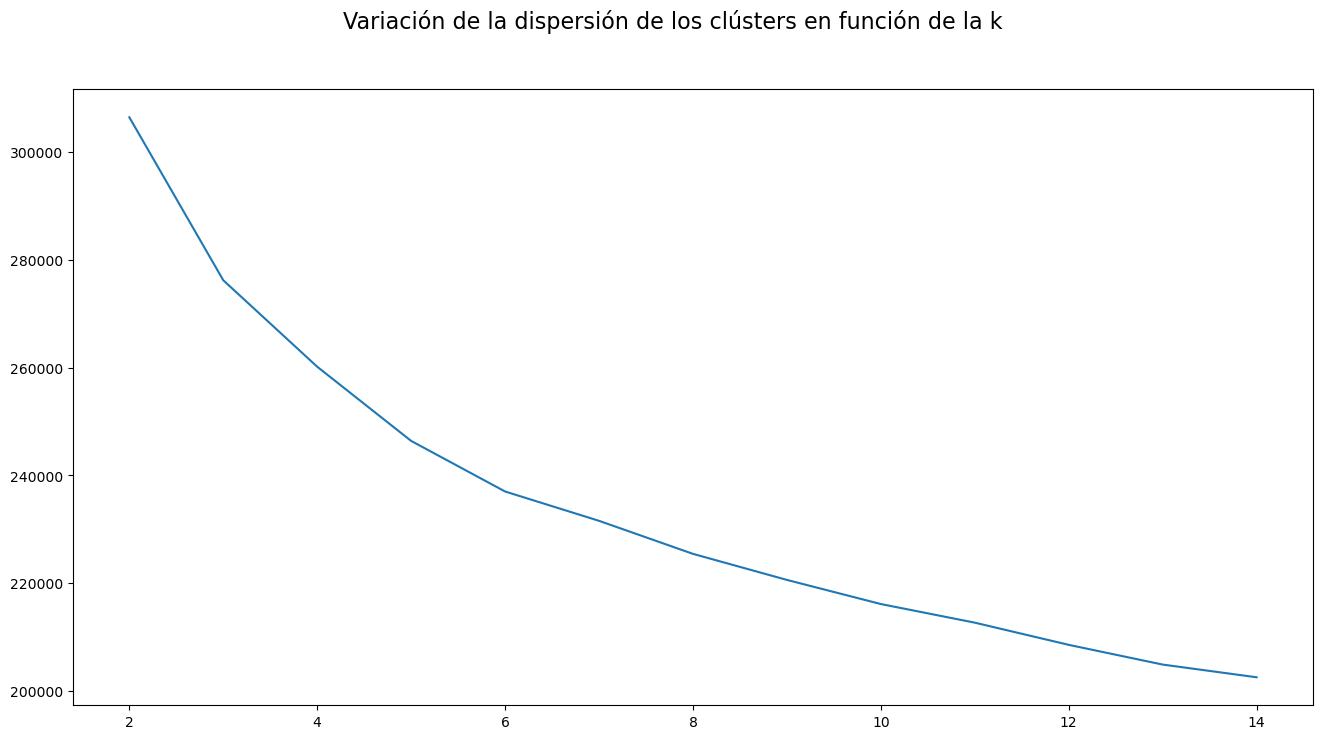

In [49]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

El valor optimo de k parece estar entre 5 y 6.

## Segmentación de los alumnos

Empezaremos segmentando los alumnos con k=5.

In [50]:
n_clusters = 5  # ejemplo, ajusta según los gráficos anteriores
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# 3. Añadir los clusters al DataFrame original
df_imputed['cluster'] = clusters

In [51]:
df_imputed.head()

,teach_friend,teach_mean,emo_impl_teach,teach_intim,edu_impl_teach,edu_impl_par,par_relation_sat,teach_relation_sat,emo_imp_parents,par_freedom,MATH_mean,READ_mean,SCIE_mean,cluster
0,2.5,0.850738,1.666667,0.774436,1.25,2.819441,3.0,2.0,2.00,2.00,494.8669,537.5307,522.2897,1
1,2.0,1.000000,2.000000,0.133933,1.00,4.000000,2.0,2.0,1.75,1.25,317.8654,348.4248,387.8819,0
2,2.0,0.496251,1.666667,0.000000,3.00,4.000000,3.0,2.0,2.00,1.50,372.5356,424.7139,349.9696,0
3,0.0,2.000000,0.000000,0.739246,2.25,3.500000,2.0,2.0,2.00,2.00,485.6010,497.4628,494.6975,1
4,3.0,1.350480,3.000000,0.000000,3.00,4.000000,3.0,3.0,2.00,1.75,432.8490,323.1210,395.8614,0


In [52]:
# 4. Obtener los centroides en la escala original
centroids_original = inverse_transform_scaled_data(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(
    centroids_original,
    columns=df_imputed.columns[:-1]  # excluimos la columna 'Cluster'
)

### Visualizaciones

In [53]:
"""
# 5. Visualizaciones

# 5.1. PCA para reducción de dimensionalidad y visualización
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# Gráfico de dispersión con PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='deep')
plt.title('Clusters en el espacio PCA')
plt.show()

# 5.2. Visualización de los centroides
plt.figure(figsize=(12, 6))
centroids_df.plot(kind='bar')
plt.title('Centroides de los Clusters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5.3. Heatmap de los centroides
plt.figure(figsize=(10, 6))
sns.heatmap(centroids_df, annot=True, cmap='YlOrRd', center=0)
plt.title('Heatmap de Centroides')
plt.tight_layout()
plt.show()

# 5.4. Distribución de variables por cluster
for column in df_imputed.columns[:-1]:  # excluimos la columna 'Cluster'
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=df_imputed)
    plt.title(f'Distribución de {column} por Cluster')
    plt.show()

# 6. Análisis de los clusters
print("\nTamaño de cada cluster:")
print(df_imputed['Cluster'].value_counts().sort_index())

print("\nCaracterísticas de cada cluster (en escala original):")
print(centroids_df)
"""


'\n# 5. Visualizaciones\n\n# 5.1. PCA para reducción de dimensionalidad y visualización\npca = PCA(n_components=2)\ndf_pca = pca.fit_transform(df_scaled)\ndf_pca = pd.DataFrame(df_pca, columns=[\'PC1\', \'PC2\'])\ndf_pca[\'Cluster\'] = clusters\n\n# Gráfico de dispersión con PCA\nplt.figure(figsize=(10, 8))\nsns.scatterplot(data=df_pca, x=\'PC1\', y=\'PC2\', hue=\'Cluster\', palette=\'deep\')\nplt.title(\'Clusters en el espacio PCA\')\nplt.show()\n\n# 5.2. Visualización de los centroides\nplt.figure(figsize=(12, 6))\ncentroids_df.plot(kind=\'bar\')\nplt.title(\'Centroides de los Clusters\')\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()\n\n# 5.3. Heatmap de los centroides\nplt.figure(figsize=(10, 6))\nsns.heatmap(centroids_df, annot=True, cmap=\'YlOrRd\', center=0)\nplt.title(\'Heatmap de Centroides\')\nplt.tight_layout()\nplt.show()\n\n# 5.4. Distribución de variables por cluster\nfor column in df_imputed.columns[:-1]:  # excluimos la columna \'Cluster\'\n    plt.figure(figs

### Ficha de los estudiantes

Creamos una ficha resumen de cada grupo con las principales variables.

In [54]:
ficha_df = pd.DataFrame()

In [55]:
"""
#ficha sencilla
(
    df_imputed
    .groupby("cluster")
    .describe()
    .T
    .style
    .background_gradient(cmap = 'Blues', axis = 1)
)
"""

'\n#ficha sencilla\n(\n    df_imputed\n    .groupby("cluster")\n    .describe()\n    .T\n    .style\n    .background_gradient(cmap = \'Blues\', axis = 1)\n)\n'

In [56]:
for i, col in enumerate(["emo_imp_parents",  "edu_impl_par", "par_freedom", "par_relation_sat", "emo_impl_teach", "edu_impl_teach", "teach_friend", "teach_mean",  "teach_intim"
                         , "teach_relation_sat",  "MATH_mean", "READ_mean", "SCIE_mean"]):
    resumen_data = df_imputed[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = pd.concat([ficha_df, resumen_data])

In [57]:
# generamos nuestro multiindex
out_index = [
    "Padres",
    "Padres",
    "Padres",
    "Padres",
    "Profesores",
    "Profesores",
    "Profesores",
    "Profesores",
    "Profesores",
    "Profesores",
    "Resultados académicos",
    "Resultados académicos", 
    "Resultados académicos"     
]

inner_index = [
    "Impl. emocional - padres",
    "Impl. educación - padres",
    "Libertad - padres",
    "Satisfacción relación - padres",
    "Impl. emocional - profesores",
    "Impl. educación - profesores",
    "Simpatía - profesores",
    "Maldad - profesores",
    "Intimidación - profesores",
    "Satisfacción relación - profesores",
    "VP matemáticas",
    "VP lectura",
    "VP ciencia"
]

estadisticos = ["Media", "Desviación", "Mínimo", "Perc. 25", "Perc. 50", "Perc. 75", "Máximo"]


new_multi_index = []

for oi, ii, in zip(out_index, inner_index):
    for es in estadisticos:
        new_multi_index.append((oi, ii, es))

In [58]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

In [59]:
names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df.set_index(index_ficha, inplace = True)

In [60]:
tamaño_clusters = df_imputed.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")] , names), inplace = True)

In [61]:
ficha_df = pd.concat([tamaño_clusters, ficha_df])

In [62]:
float_format = '{:.3f}'

(
    ficha_df
    .style
    .format(float_format)
    .background_gradient(cmap = 'Blues', axis = 1)
)

In [285]:
""""
# 1. Calcular estadísticas básicas por cluster
cluster_stats = df_imputed.groupby('Cluster').agg({
    'teach_friend': ['mean', 'std', 'min', 'max'],
    'teach_mean': ['mean', 'std', 'min', 'max'],
    'emo_impl_teach': ['mean', 'std', 'min', 'max'],
    'teach_intim': ['mean', 'std', 'min', 'max'],
    'edu_impl_teach': ['mean', 'std', 'min', 'max'],
    'edu_impl_par': ['mean', 'std', 'min', 'max'],
    'par_relation_sat': ['mean', 'std', 'min', 'max'],
    'teach_relation_sat': ['mean', 'std', 'min', 'max'],
    'emo_imp_parents': ['mean', 'std', 'min', 'max'],
    'par_freedom': ['mean', 'std', 'min', 'max'],
    'MATH_mean': ['mean', 'std', 'min', 'max'],
    'READ_mean': ['mean', 'std', 'min', 'max'],
    'SCIE_mean': ['mean', 'std', 'min', 'max']
}).round(2)

# 2. Calcular el tamaño y porcentaje de cada cluster
cluster_sizes = df_imputed['Cluster'].value_counts()
cluster_percentages = (cluster_sizes / len(df_imputed) * 100).round(2)

# 3. Crear un resumen detallado
print("RESUMEN DE CLUSTERS DE ESTUDIANTES")
print("=" * 50)

for cluster in sorted(df_imputed['Cluster'].unique()):
    print(f"\nCLUSTER {cluster}")
    print("-" * 30)
    
    # Tamaño del cluster
    print(f"Tamaño: {cluster_sizes[cluster]} estudiantes ({cluster_percentages[cluster]}%)")
    
    # Características principales
    print("\nCaracterísticas principales:")
    print("-" * 20)
    
    # Obtener los valores de los centroides para este cluster
    cluster_centroid = centroids_df.iloc[cluster]
    
    # Ordenar las variables por su valor en el centroide
    sorted_vars = cluster_centroid.sort_values(ascending=False)
    
    # Mostrar las características más destacadas
    print("Variables más altas:")
    for var, value in sorted_vars.head(3).items():
        print(f"- {var}: {value:.2f}")
    
    print("\nVariables más bajas:")
    for var, value in sorted_vars.tail(3).items():
        print(f"- {var}: {value:.2f}")
    
    # Estadísticas detalladas
    print("\nEstadísticas detalladas:")
    print("-" * 20)
    for var in df_imputed.columns[:-1]:  # excluimos la columna 'Cluster'
        stats = df_imputed[df_imputed['Cluster'] == cluster][var].describe()
        print(f"\n{var}:")
        print(f"  Media: {stats['mean']:.2f}")
        print(f"  Mediana: {stats['50%']:.2f}")
        print(f"  Desviación estándar: {stats['std']:.2f}")
        print(f"  Rango: [{stats['min']:.2f}, {stats['max']:.2f}]")

# 4. Crear un DataFrame con el resumen
cluster_summary = pd.DataFrame({
    'Tamaño': cluster_sizes,
    'Porcentaje': cluster_percentages,
    'teach_friend_mean': df_imputed.groupby('Cluster')['teach_friend'].mean(),
    'teach_mean_mean': df_imputed.groupby('Cluster')['teach_mean'].mean(),
    'emo_impl_teach_mean': df_imputed.groupby('Cluster')['emo_impl_teach'].mean(),
    'teach_intim_mean': df_imputed.groupby('Cluster')['teach_intim'].mean(),
    'edu_impl_teach_mean': df_imputed.groupby('Cluster')['edu_impl_teach'].mean(),
    'edu_impl_par_mean': df_imputed.groupby('Cluster')['edu_impl_par'].mean(),
    'par_relation_sat_mean': df_imputed.groupby('Cluster')['par_relation_sat'].mean(),
    'teach_relation_sat_mean': df_imputed.groupby('Cluster')['teach_relation_sat'].mean(),
    'emo_imp_parents_mean': df_imputed.groupby('Cluster')['emo_imp_parents'].mean(),
    'par_freedom_mean': df_imputed.groupby('Cluster')['par_freedom'].mean(),
    'MATH_mean_mean': df_imputed.groupby('Cluster')['MATH_mean'].mean(),
    'READ_mean_mean': df_imputed.groupby('Cluster')['READ_mean'].mean(),
    'SCIE_mean_mean': df_imputed.groupby('Cluster')['SCIE_mean'].mean()
}).round(2)

# 5. Guardar el resumen en un archivo CSV
# cluster_summary.to_csv('data/processed/cluster_summary.csv')

# 6. Visualización adicional: Radar plot para comparar clusters
import plotly.graph_objects as go

# Crear el radar plot
fig = go.Figure()

for cluster in sorted(df_imputed['Cluster'].unique()):
    cluster_centroid = centroids_df.iloc[cluster]
    fig.add_trace(go.Scatterpolar(
        r=cluster_centroid.values,
        theta=cluster_centroid.index,
        fill='toself',
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-3, 3]  # Ajusta según tus datos
        )),
    showlegend=True,
    title="Comparación de Clusters"
)

fig.show()
"""

'"\n# 1. Calcular estadísticas básicas por cluster\ncluster_stats = df_imputed.groupby(\'Cluster\').agg({\n    \'teach_friend\': [\'mean\', \'std\', \'min\', \'max\'],\n    \'teach_mean\': [\'mean\', \'std\', \'min\', \'max\'],\n    \'emo_impl_teach\': [\'mean\', \'std\', \'min\', \'max\'],\n    \'teach_intim\': [\'mean\', \'std\', \'min\', \'max\'],\n    \'edu_impl_teach\': [\'mean\', \'std\', \'min\', \'max\'],\n    \'edu_impl_par\': [\'mean\', \'std\', \'min\', \'max\'],\n    \'par_relation_sat\': [\'mean\', \'std\', \'min\', \'max\'],\n    \'teach_relation_sat\': [\'mean\', \'std\', \'min\', \'max\'],\n    \'emo_imp_parents\': [\'mean\', \'std\', \'min\', \'max\'],\n    \'par_freedom\': [\'mean\', \'std\', \'min\', \'max\'],\n    \'MATH_mean\': [\'mean\', \'std\', \'min\', \'max\'],\n    \'READ_mean\': [\'mean\', \'std\', \'min\', \'max\'],\n    \'SCIE_mean\': [\'mean\', \'std\', \'min\', \'max\']\n}).round(2)\n\n# 2. Calcular el tamaño y porcentaje de cada cluster\ncluster_sizes =

## Guardamos

In [286]:
import json
import joblib
import pandas as pd
import numpy as np
from datetime import datetime

# 1. Crear directorio para guardar los resultados si no existe
import os
if not os.path.exists('C:\\Users\\saraf\\OneDrive\\Documentos\\Data Science and AI\\capstone project\\data\\processed\\clustering_results'):
    os.makedirs('C:\\Users\\saraf\\OneDrive\\Documentos\\Data Science and AI\\capstone project\\data\\processed\\clustering_results')

# 2. Guardar el modelo KMeans
joblib.dump(kmeans, 'C:\\Users\\saraf\\OneDrive\\Documentos\\Data Science and AI\\capstone project\\data\\processed\\clustering_results\\kmeans_model.joblib')

# 3. Guardar los parámetros del clustering
clustering_params = {
    'n_clusters': kmeans.n_clusters,
    'random_state': kmeans.random_state,
    'n_init': kmeans.n_init,
    'max_iter': kmeans.max_iter,
    'algorithm': kmeans.algorithm,
    'variables_used': list(df_scaled.columns),
    'date_created': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

with open('C:\\Users\\saraf\\OneDrive\\Documentos\\Data Science and AI\\capstone project\\data\\processed\\clustering_results\\clustering_params.json', 'w') as f:
    json.dump(clustering_params, f, indent=4)

# 4. Guardar los datos con los clusters
df_imputed.to_csv('C:\\Users\\saraf\\OneDrive\\Documentos\\Data Science and AI\\capstone project\\data\\processed\\clustering_results\\df_students_clustered.csv', index=False)

